Epoch 100/1000, Loss: 7.0334
Epoch 200/1000, Loss: 7.0234
Epoch 300/1000, Loss: 7.0232
Epoch 400/1000, Loss: 7.0232
Epoch 500/1000, Loss: 7.0232
Epoch 600/1000, Loss: 7.0232
Epoch 700/1000, Loss: 7.0232
Epoch 800/1000, Loss: 7.0232
Epoch 900/1000, Loss: 7.0232
Epoch 1000/1000, Loss: 7.0232


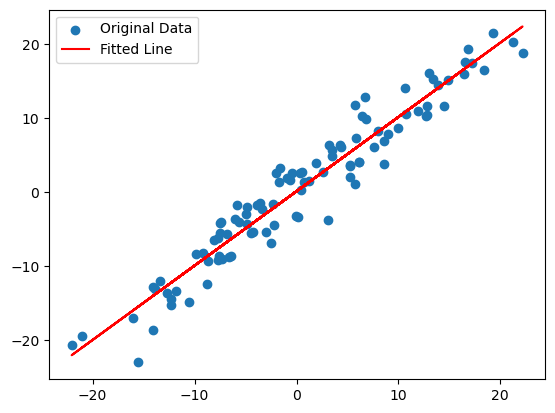

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate some data
torch.manual_seed(42)  # Set a random seed for reproducibility
X = torch.randn(100, 1) * 10  # Generate 100 random data points (features), scaled by 10
y = X + 3*torch.randn(100, 1)  # Create the target values with some added noise

# Define the Linear Regression model
class LinearRegressionModel(nn.Module):  # Define a class for the model that inherits from nn.Module
    def __init__(self):
        super(LinearRegressionModel, self).__init__()  # Call the parent class constructor
        self.linear = nn.Linear(1, 1)  # Create a linear layer (1 input feature, 1 output)

    def forward(self, x):  # Define the forward pass
        return self.linear(x)  # Pass input through the linear layer

# Instantiate the model, define loss function and optimizer
model = LinearRegressionModel()  # Create an instance of the linear regression model
criterion = nn.MSELoss()  # Mean Squared Error (MSE) loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer with learning rate 0.01

# Training loop
epochs = 1000  # Set the number of training epochs
for epoch in range(epochs):  # Loop over the number of epochs
    model.train()  # Set the model to training mode

    # Forward pass: Compute predicted y by passing X to the model
    y_pred = model(X)  # Get the model's predictions for X

    # Compute loss
    loss = criterion(y_pred, y)  # Calculate the loss (MSE) between predicted and actual values

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients (otherwise they accumulate)
    loss.backward()  # Perform backpropagation to compute gradients
    optimizer.step()  # Update the model parameters based on the gradients

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:  # Every 100 epochs, print the loss
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')  # Display the current epoch and loss value

# Visualize the results
model.eval()  # Set the model to evaluation mode
predicted = model(X).detach().numpy()  # Get the model's predictions and detach them from the computation graph

plt.scatter(X.numpy(), y.numpy(), label='Original Data')  # Scatter plot of the original data points
plt.plot(X.numpy(), predicted, label='Fitted Line', color='r')  # Plot the fitted line (model's predictions)
plt.legend()  # Add a legend
plt.show()  # Display the plot
